#1. Defining the question 

## a) Specifying the Question

 Implementing K-nearest neighbor (kNN) classifier

##b) Defining the Metric for Success

## c) Understanding the context

## d) Recording the Experimental Design

* Loading the dataset
* Exploratory Data Analysis
* Visualization
* Data Cleaning
* Features Engineering
* Modeling: K-Nearest Neighbors Classifier (KNN)
* Hyperparameter Tuning
* Optimization techinques for KNN
* Challenging the solution

## e) Data Relevance

# 2. Reading the data

In [1]:
#importing our libraries.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split    
from sklearn.preprocessing import StandardScaler        
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score              
from sklearn.metrics import classification_report

In [4]:
#reading our data
train = pd.read_csv("/content/train (5).csv")
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
train.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [8]:
# checking for null values
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

The cabin column has so many null values hence we will drop it while the null values in age will be filled with the mean.Embarked will be filled with mode

In [9]:
# checking for duplicates
train.duplicated().sum()

0

In [10]:
# Checking column datatype
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [11]:
#Describing our data
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


# Tidying the dataset

In [13]:
#Dealing with null values.
#filling the null values in  age with mean
train['Age']= train['Age'].fillna(train['Age'].mean(), axis = 0)
#drop unecessary columns such as cabin with a lot of null values
train.drop(['Cabin','Name','Ticket'], axis=1,inplace=True)
#checking there are null values
train.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Sex            0
Age            0
SibSp          0
Parch          0
Fare           0
Embarked       2
dtype: int64

In [14]:
# drop the null in embarked 
train=train.dropna()
#checking if we have no null values
train.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Sex            0
Age            0
SibSp          0
Parch          0
Fare           0
Embarked       0
dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn

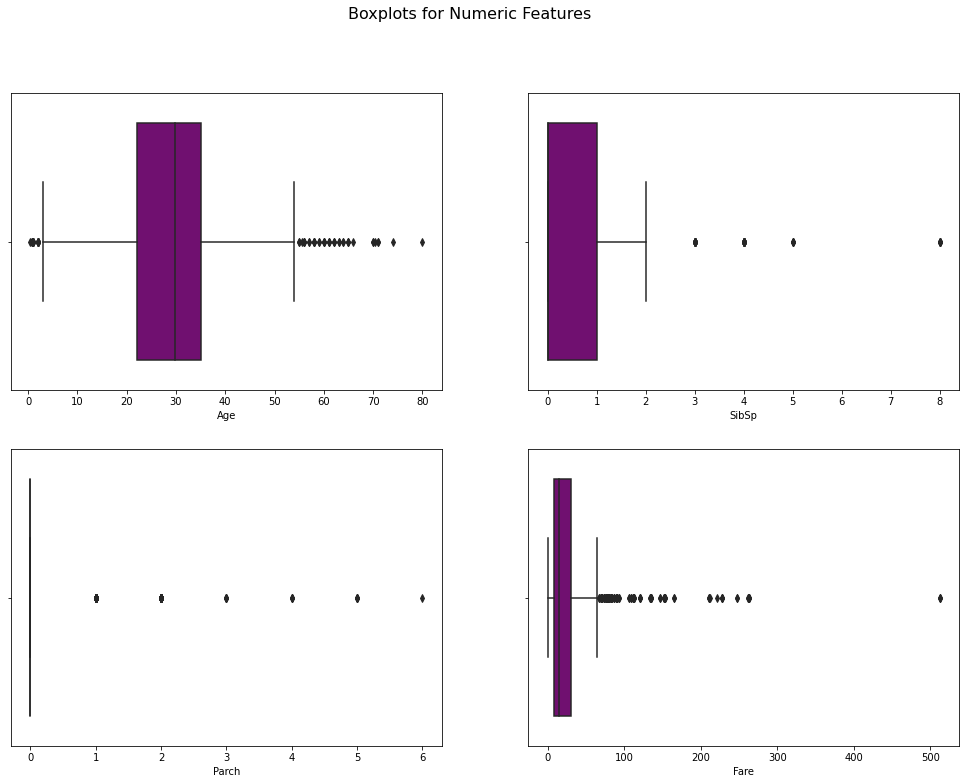

In [15]:
# Checking for outliers using boxplots
cols = ['Age', 'SibSp', 'Parch', 'Fare']
fig, axes = plt.subplots(nrows = 2, ncols = 2, figsize = (17, 12))
for ax, data, name in zip(axes.flatten(), train, cols):
  sns.boxplot(train[name], color = 'purple', ax = ax)
  plt.suptitle('Boxplots for Numeric Features', fontsize = 16)
  plt.subplots_adjust()

# Exploratory Analysis

## Univariate analysi

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

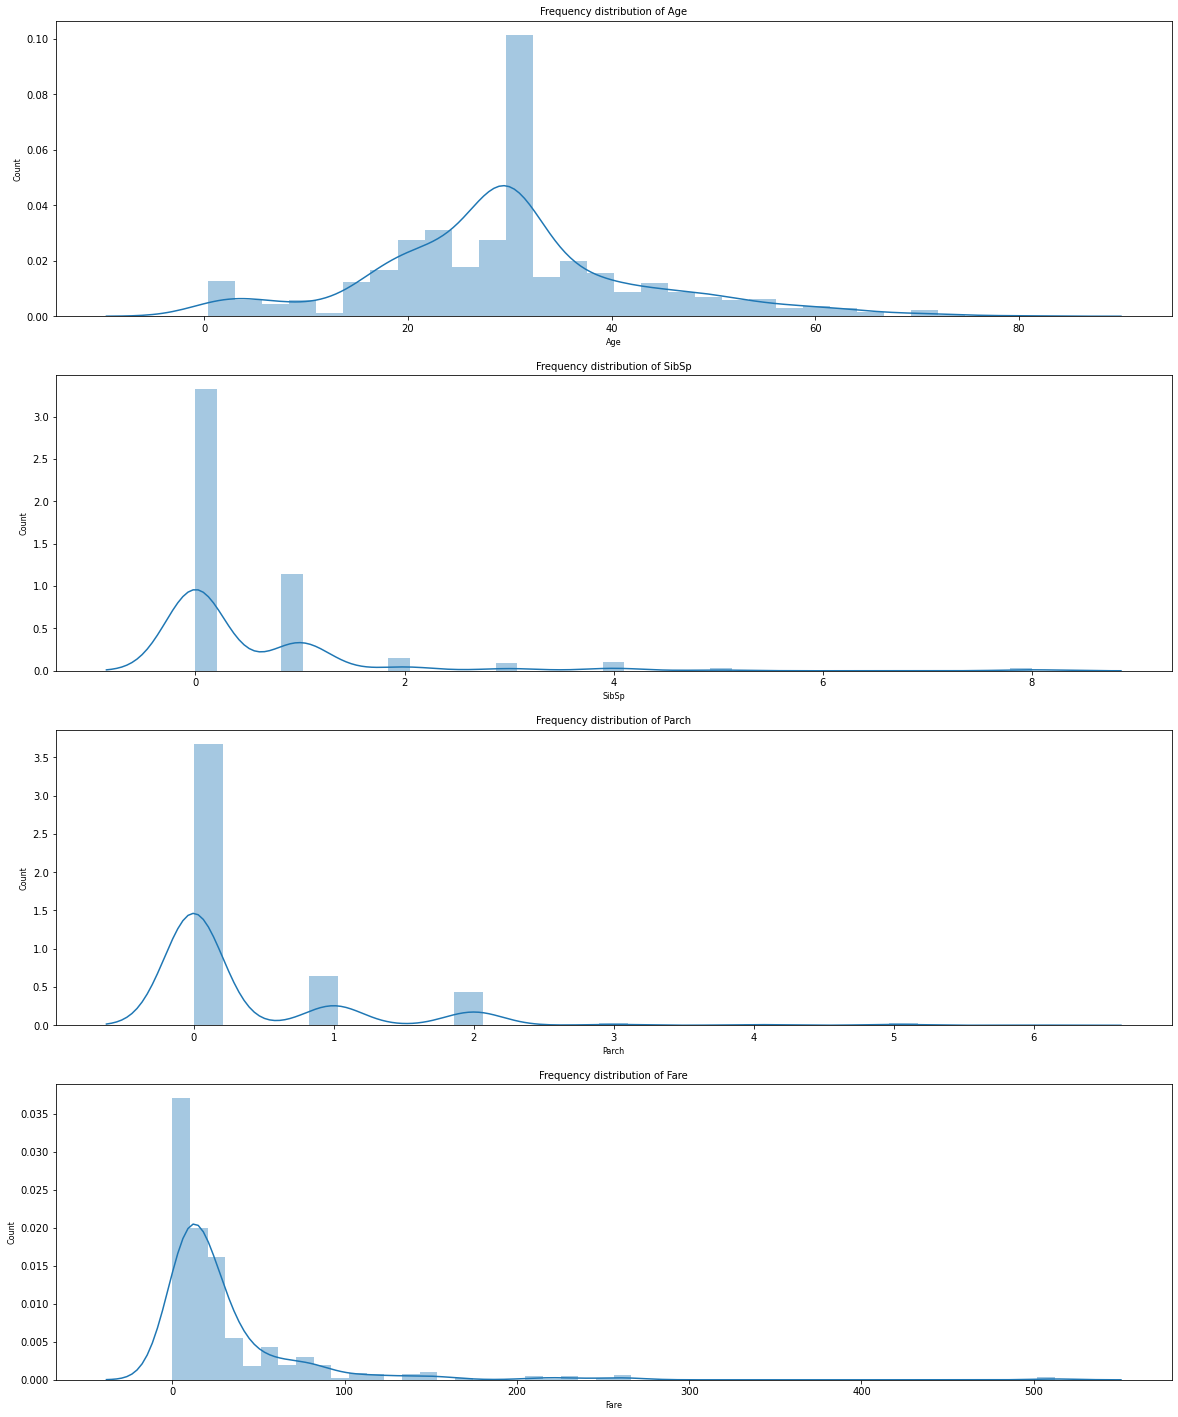

In [17]:

# distribution of numerical variables.

fig, ax = plt.subplots(len(cols), figsize=(20,25))

for i, col_val in enumerate(cols):

    sns.distplot(train[col_val], hist=True, ax=ax[i])
    ax[i].set_title('Frequency distribution of '+col_val, fontsize=10)
    ax[i].set_xlabel(col_val, fontsize=8)
    ax[i].set_ylabel('Count', fontsize=8)
    

plt.show()

Text(0.5, 0, 'Pclass')

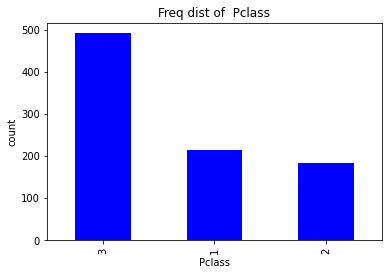

In [18]:
#Distribution of the Pclass
train['Pclass'].value_counts().plot.bar(title='Freq dist of  Pclass', color = 'blue')
plt.ylabel('count')
plt.xlabel('Pclass')

Text(0.5, 0, 'Survived')

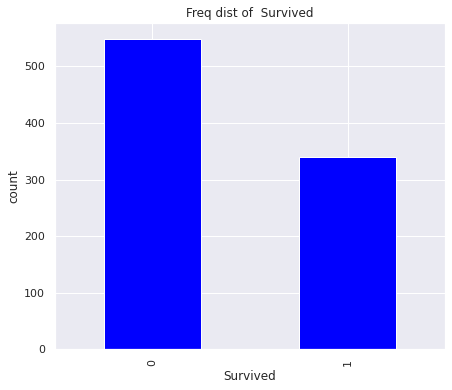

In [20]:
#Distribution of the Survivors
train['Survived'].value_counts().plot.bar(title='Freq dist of  Survived', color = 'blue')
plt.ylabel('count')
plt.xlabel('Survived')

0= Did not survive

1= Survived

Over 500 people did not survive. 300 people survived

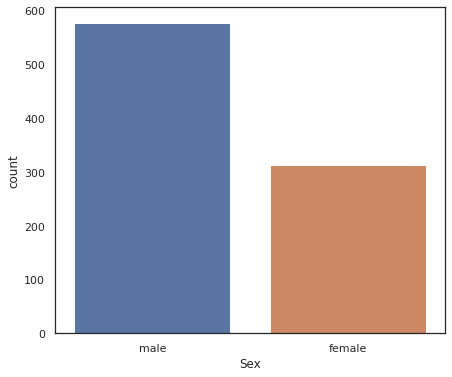

In [21]:
#  Checking the distribution of Sex column
# 
sns.set_style('white')
sns.countplot(x='Sex',data=train)

## Bivariate Analysis

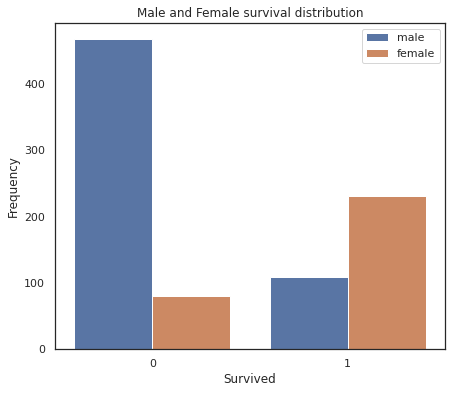

In [22]:
#Bar plot of sex vs Survived
ax = sns.countplot(x=train['Survived'], hue=train['Sex'],data=train,orient="h", alpha=1)
plt.title('Male and Female survival distribution')
plt.xlabel('Survived')
plt.xticks(rotation=0)
plt.legend(["male", "female"])
plt.ylabel('Frequency')
plt.show()

Text(0.5, 0, 'Pclass')

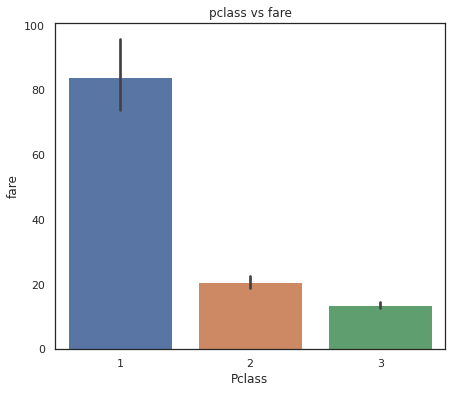

In [23]:
# barplot of Pclass and Fare
sns.barplot(x='Pclass',y='Fare',data = train)
plt.title('pclass vs fare')
plt.ylabel('fare')
plt.xlabel('Pclass')

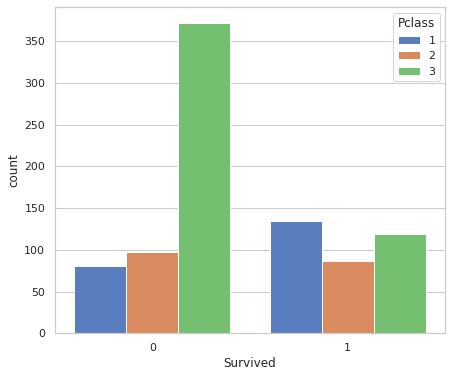

In [24]:
#  Comparing Survived column and Pclass column to understand who survided more,  and from which class
sns.set_style('whitegrid')
sns.countplot(x='Survived',hue='Pclass',data=train,palette='muted')

## Feature engineering

In [25]:
train.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch',
       'Fare', 'Embarked'],
      dtype='object')

In [26]:
# Create a dictionary to manually encode the categorical data
dict_data = {"Sex": {"male": 1, "female": 0},
             'Embarked':{"S":0,'C':1, 'Q':3},
          
                }
train.replace(dict_data, inplace=True)

In [28]:
train.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,1,22.0,1,0,7.2500,0
1,2,1,1,0,38.0,1,0,71.2833,1
2,3,1,3,0,26.0,0,0,7.9250,0
3,4,1,1,0,35.0,1,0,53.1000,0
4,5,0,3,1,35.0,0,0,8.0500,0


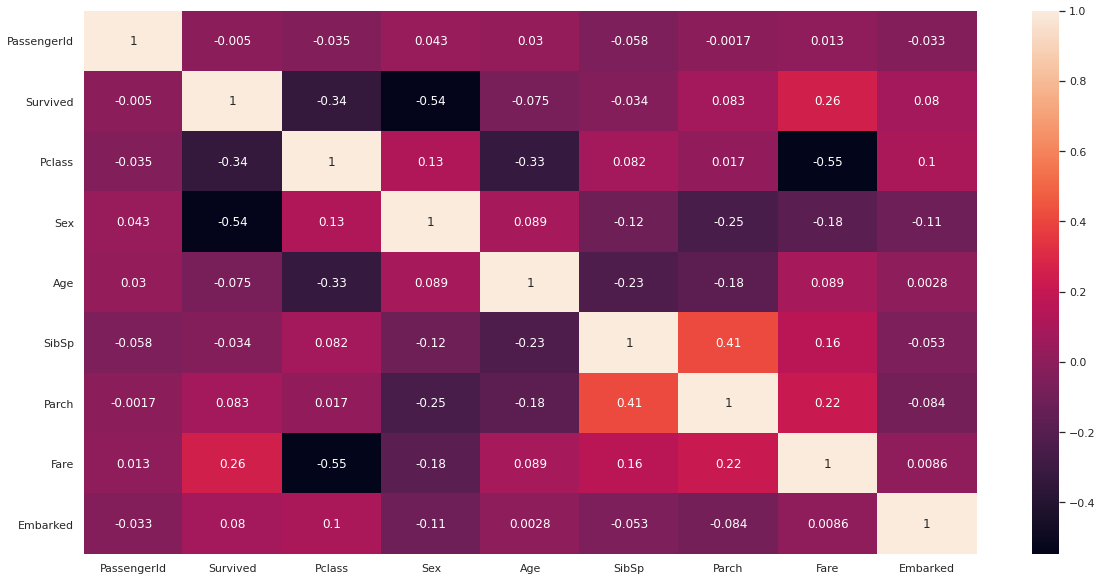

In [29]:
#visualizing the correlation between features
plt.figure(figsize=(20, 10))
corr = train.corr()
sns.heatmap(corr, 
            xticklabels = corr.columns.values,
            yticklabels = corr.columns.values,
            annot = True);

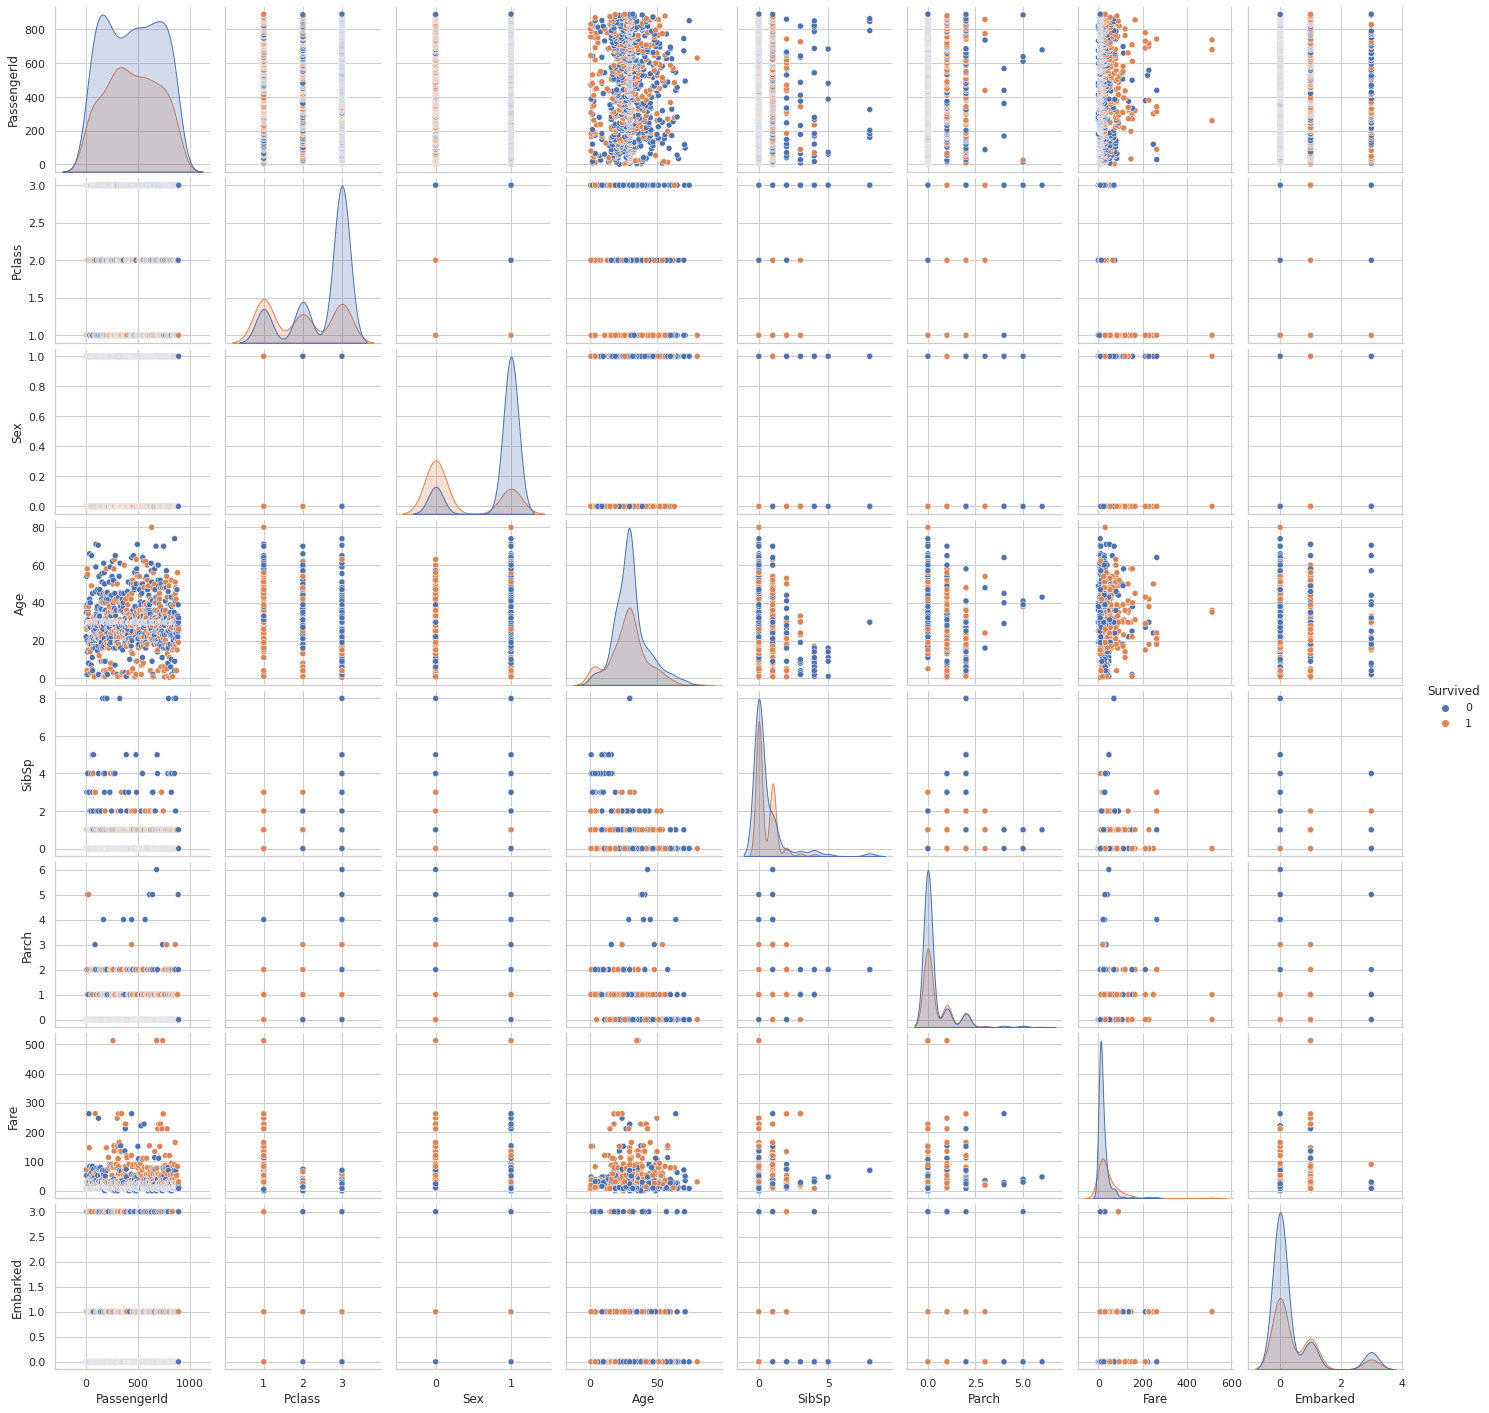

In [30]:
# Use of a pairplot to check for correlation between variables.

columns= ['PassengerId',  'Pclass', 'Sex', 'Age', 'SibSp', 'Parch',
       'Fare', 'Embarked']

sns.pairplot(train, kind="scatter", diag_kind="kde", vars=columns, hue="Survived")
plt.show()

## Multivariate Analysis

Linear Discriminant Analysis(LDA)

In [31]:
#Separating features and labels /preprocessing
X = train.drop(['Survived'], axis=1)
y = train["Survived"].values

In [32]:
#Split the data into a training set and testing set.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [33]:
#Checking how many rows our train set has.
#We have 8 columns.
X_train.shape

(711, 8)

In [35]:
# Applying the LDA transformation.
# To use a specified number of components we can specify
#
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
lda = LDA()
X_train = lda.fit_transform(X_train, y_train)
X_test = lda.transform(X_test)

In [36]:
X_train.shape

(711, 1)

# Implementing the solution


K-nearest neighbor classification

In [37]:
#Normalisation
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [38]:
# Fit classifier 
classifier = KNeighborsClassifier(n_neighbors=3)
classifier.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                     weights='uniform')

In [39]:
#predicting test data
y_pred= classifier.predict(X_test)

In [40]:
# Evaluating the predictions made by the model

# Using Classification report
print(classification_report(y_test, y_pred))
# Using  the accuracy score
print(confusion_matrix(y_test, y_pred))
print('The accuracy score of the model is :',accuracy_score(y_pred,y_test))

              precision    recall  f1-score   support

           0       0.73      0.79      0.76       105
           1       0.66      0.58      0.61        73

    accuracy                           0.70       178
   macro avg       0.69      0.68      0.69       178
weighted avg       0.70      0.70      0.70       178

[[83 22]
 [31 42]]
The accuracy score of the model is : 0.702247191011236


In [41]:

# Splitting the data into train and test sets
# partitioning the data into 70-30 

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

# Fitting the KNN classifier model to the training data

clf = KNeighborsClassifier()
clf.fit(X_train, y_train)


# Predicting the outcome

y_pred = clf.predict(X_test)

# Evaluating the predictions made by the model

# 1. Using Classification report
print(classification_report(y_test, y_pred))


# 2. Using  the accuracy score
print(confusion_matrix(y_test, y_pred))
print('The accuracy score of the model is :',accuracy_score(y_pred,y_test))

              precision    recall  f1-score   support

           0       0.63      0.77      0.69       157
           1       0.52      0.35      0.42       110

    accuracy                           0.60       267
   macro avg       0.58      0.56      0.56       267
weighted avg       0.58      0.60      0.58       267

[[121  36]
 [ 71  39]]
The accuracy score of the model is : 0.599250936329588


In [42]:

# Splitting the data into train and test sets
# partitioning the data into 60-40 

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.4, random_state = 0)

# Fitting the KNN classifier model to the training data

clf = KNeighborsClassifier()
clf.fit(X_train, y_train)


# Predicting the outcome

y_pred = clf.predict(X_test)

# Evaluating the predictions made by the model

# 1. Using Classification report
print(classification_report(y_test, y_pred))


# 2. Using  the accuracy score
print(confusion_matrix(y_test, y_pred))
print('The accuracy score of the model is :',accuracy_score(y_pred,y_test))

              precision    recall  f1-score   support

           0       0.65      0.80      0.72       216
           1       0.53      0.34      0.42       140

    accuracy                           0.62       356
   macro avg       0.59      0.57      0.57       356
weighted avg       0.60      0.62      0.60       356

[[173  43]
 [ 92  48]]
The accuracy score of the model is : 0.6207865168539326



## Improving the model performance

In [43]:
#hyper-parameter tune our model to improve accuracy. We will use the grid search.

param_grid = {'n_neighbors': [3,4,5,6,7,8,9,10,11,12,13,14,15], 'weights':['uniform', 'distance'], 'algorithm':['ball_tree', 'kd_tree', 'brute'] }
clf = GridSearchCV(KNeighborsClassifier(), param_grid, refit = True, cv = 10 ,n_jobs= 1, verbose  = 0)
print('best parameters:', clf.fit(X_train,y_train))

best parameters: GridSearchCV(cv=10, error_score=nan,
             estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                            metric='minkowski',
                                            metric_params=None, n_jobs=None,
                                            n_neighbors=5, p=2,
                                            weights='uniform'),
             iid='deprecated', n_jobs=1,
             param_grid={'algorithm': ['ball_tree', 'kd_tree', 'brute'],
                         'n_neighbors': [3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,
                                         14, 15],
                         'weights': ['uniform', 'distance']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)


In [44]:
#fittting our model with the best parameters
clf2 = KNeighborsClassifier(n_neighbors = 5, algorithm = 'auto', leaf_size = 30,metric='minkowski',weights='uniform' )
clf2.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [45]:
#predicting the results.
y_pred = clf.predict(X_test)
#assessing the accuracy of the model
print('accuracy:', accuracy_score(y_test, y_pred))

accuracy: 0.6432584269662921


## Conclusion


The best accuracy score was 70% where we split the data 80-20% and an f1 score of 0.70. This accuracy did not improve rather it reduced when we fitted the best parameters hence we would just go with the accuracy of 70% unless we challenge our solution further.

# Challenging the solution

Random forest tree

In [46]:

#Using Random Forest which is an Ensemble algorithm
# Instantiating our model
# Training the model
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_predict
random_forest = RandomForestClassifier(criterion = "gini", 
                                       min_samples_leaf = 1, 
                                       min_samples_split = 10,   
                                       n_estimators=100, 
                                       max_features='auto', 
                                       oob_score=True, 
                                       random_state=10,
                                       n_jobs=-1) 
random_forest.fit(X_train, y_train)

# Making predictions
Y_prediction = random_forest.predict(X_test)

# Evaluating the model
random_forest.score(X_train, y_train)

acc_random_forest = round(random_forest.score(X_train, y_train) * 100, 2)
print(round(acc_random_forest,2,), "%")

# Generating cross-validated estimates for each input data point
predictions = cross_val_predict(random_forest, X_train, y_train, cv=3)


print(confusion_matrix(y_train, predictions))
print(classification_report(y_train, predictions))

91.93 %
[[303  30]
 [ 60 140]]
              precision    recall  f1-score   support

           0       0.83      0.91      0.87       333
           1       0.82      0.70      0.76       200

    accuracy                           0.83       533
   macro avg       0.83      0.80      0.81       533
weighted avg       0.83      0.83      0.83       533



## Conclusion

The random forest model has performed best compared to our KNN model which is a lazy learner. With an accuracy of 91.93%. I would recommend we use the random forest model for this challenge so as to get the best predictions.